In [1]:
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
data_path = pathlib.Path("C:/小圖片/food_pic200_640")
category = 10

In [3]:

# 訓練、驗證資料集
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="int",
    image_size=(320,320),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="int",
    image_size=(320,320),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

Found 2000 files belonging to 10 classes.
Using 1600 files for training.
Found 2000 files belonging to 10 classes.
Using 400 files for validation.


In [4]:
# data_augmentation = tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomZoom(0.2),
#     layers.experimental.preprocessing.RandomContrast(factor=0.1),
#     layers.experimental.preprocessing.RandomRotation(factor=0.2),
#     layers.GaussianNoise(0.2),
# ])

In [5]:
inputs = layers.Input(shape=(320, 320, 3))

# x = data_augmentation(inputs)
# x = layers.Rescaling(1./255)(x)
x = layers.Rescaling(1./255)(inputs)

base_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_tensor=x,
    input_shape=(320, 320, 3),
    pooling=None
)

# Freeze the base ResNet50 layers
base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(category, activation='softmax')(x)

model = Model(inputs, outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0043)  #0.0013
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 320, 320, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 326, 326, 3)  0           rescaling[0][0]                  
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 160, 160, 64) 9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

In [7]:
# EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                          mode="min")

# ModelCheckpoint
checkpoint = ModelCheckpoint('resnet50.{epoch:03d}-{val_loss:.4f}.pb',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode="min")  

callbacks = [early_stop, checkpoint]

In [8]:
# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint(
#         filepath='RNet50V2_{epoch:02d}_{val_loss:4f}.pb',
#         save_best_only=True,
#         monitor='val_loss',
#         verbose=0
#     )
# ]

In [9]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=200,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/200
50/50 [==============================] - 22s 299ms/step - loss: 0.8904 - acc: 0.7156 - val_loss: 0.1588 - val_acc: 0.9725
INFO:tensorflow:Assets written to: resnet50.001-0.1588.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/200
50/50 [==============================] - 15s 288ms/step - loss: 0.1493 - acc: 0.9606 - val_loss: 0.0921 - val_acc: 0.9825
INFO:tensorflow:Assets written to: resnet50.002-0.0921.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/200
50/50 [==============================] - 15s 288ms/step - loss: 0.0989 - acc: 0.9719 - val_loss: 0.0748 - val_acc: 0.9875
INFO:tensorflow:Assets written to: resnet50.003-0.0748.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/200
50/50 [==============================] - 15s 289ms/step - loss: 0.0593 - acc: 0.9906 - val_loss: 0.0583 - val_acc: 0.9875
INFO:tensorflow:Assets written to: resnet50.004-0.0583.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/200
50/50 [==============================] - 15s 288ms/step - loss: 0.0517 - acc: 0.9856 - val_loss: 0.0502 - val_acc: 0.9825
INFO:tensorflow:Assets written to: resnet50.005-0.0502.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/200
50/50 [==============================] - 15s 289ms/step - loss: 0.0455 - acc: 0.9875 - val_loss: 0.0417 - val_acc: 0.9925
INFO:tensorflow:Assets written to: resnet50.006-0.0417.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 7/200
50/50 [==============================] - 15s 288ms/step - loss: 0.0444 - acc: 0.9887 - val_loss: 0.0415 - val_acc: 0.9925
INFO:tensorflow:Assets written to: resnet50.007-0.0415.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 8/200
50/50 [==============================] - 15s 287ms/step - loss: 0.0366 - acc: 0.9919 - val_loss: 0.0444 - val_acc: 0.9900
Epoch 9/200
50/50 [==============================] - 14s 288ms/step - loss: 0.0227 - acc: 0.9962 - val_loss: 0.0405 - val_acc: 0.9875
INFO:tensorflow:Assets written to: resnet50.009-0.0405.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 10/200
50/50 [==============================] - 15s 289ms/step - loss: 0.0275 - acc: 0.9925 - val_loss: 0.0448 - val_acc: 0.9875
Epoch 11/200
50/50 [==============================] - 14s 288ms/step - loss: 0.0213 - acc: 0.9931 - val_loss: 0.0376 - val_acc: 0.9900
INFO:tensorflow:Assets written to: resnet50.011-0.0376.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 12/200
50/50 [==============================] - 62s 1s/step - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0394 - val_acc: 0.9900
Epoch 13/200
50/50 [==============================] - 15s 291ms/step - loss: 0.0179 - acc: 0.9969 - val_loss: 0.0295 - val_acc: 0.9950
INFO:tensorflow:Assets written to: resnet50.013-0.0295.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 14/200
50/50 [==============================] - 15s 290ms/step - loss: 0.0176 - acc: 0.9950 - val_loss: 0.0380 - val_acc: 0.9875
Epoch 15/200
50/50 [==============================] - 15s 291ms/step - loss: 0.0169 - acc: 0.9962 - val_loss: 0.0291 - val_acc: 0.9900
INFO:tensorflow:Assets written to: resnet50.015-0.0291.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 16/200
50/50 [==============================] - 15s 287ms/step - loss: 0.0162 - acc: 0.9969 - val_loss: 0.0193 - val_acc: 0.9975
INFO:tensorflow:Assets written to: resnet50.016-0.0193.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 17/200
50/50 [==============================] - 15s 288ms/step - loss: 0.0146 - acc: 0.9956 - val_loss: 0.0238 - val_acc: 0.9950
Epoch 18/200
50/50 [==============================] - 14s 288ms/step - loss: 0.0200 - acc: 0.9956 - val_loss: 0.0245 - val_acc: 0.9975
Epoch 19/200
50/50 [==============================] - 14s 288ms/step - loss: 0.0137 - acc: 0.9975 - val_loss: 0.0220 - val_acc: 0.9950
Epoch 20/200
50/50 [==============================] - 15s 289ms/step - loss: 0.0110 - acc: 0.9975 - val_loss: 0.0292 - val_acc: 0.9925
Epoch 21/200
50/50 [==============================] - 15s 291ms/step - loss: 0.0146 - acc: 0.9962 - val_loss: 0.0266 - val_acc: 0.9925


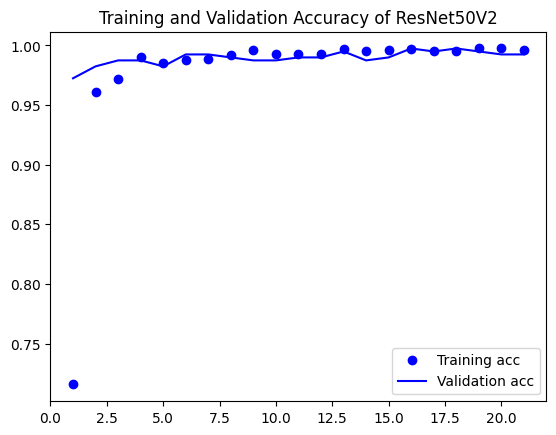

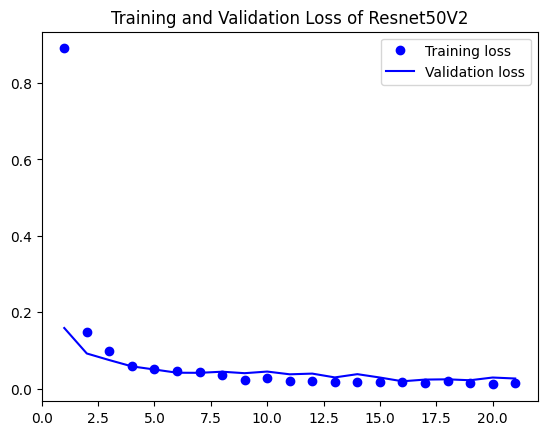

In [10]:
# Plotting training and validation accuracy
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy of ResNet50V2")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss of Resnet50V2")
plt.legend()
plt.show()